In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

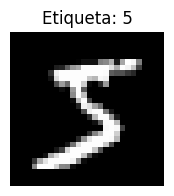

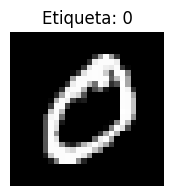

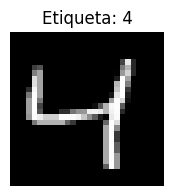

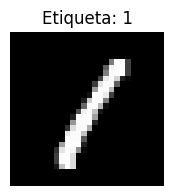

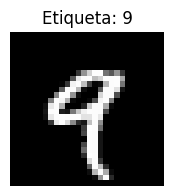

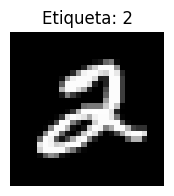

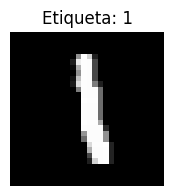

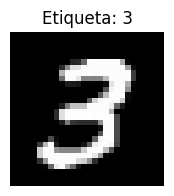

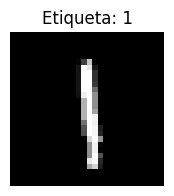

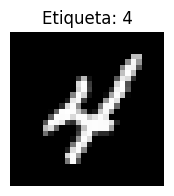

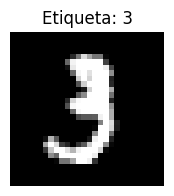

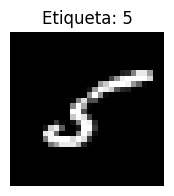

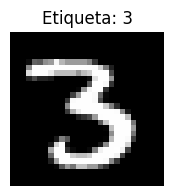

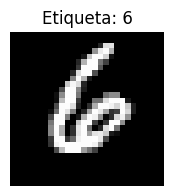

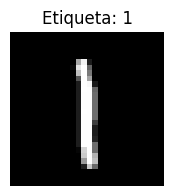

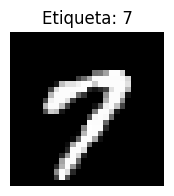

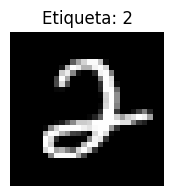

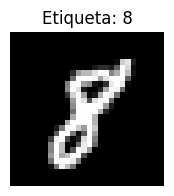

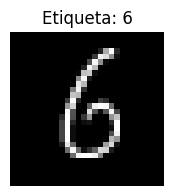

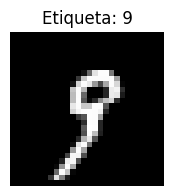

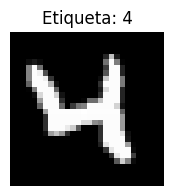

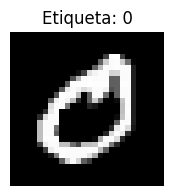

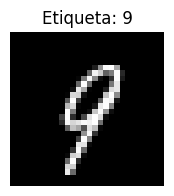

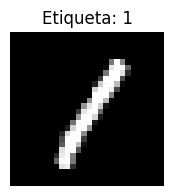

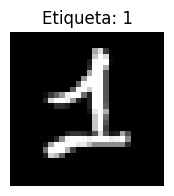

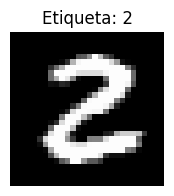

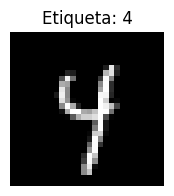

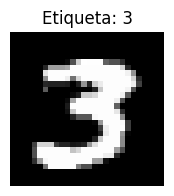

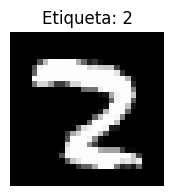

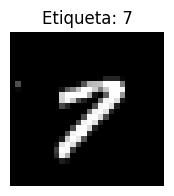

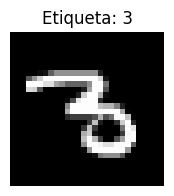

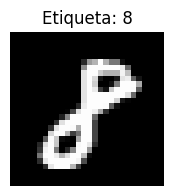

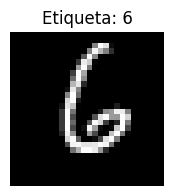

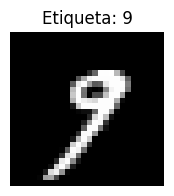

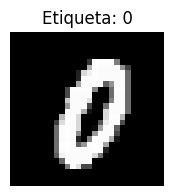

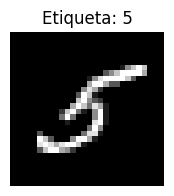

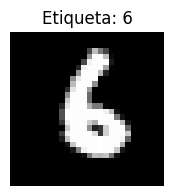

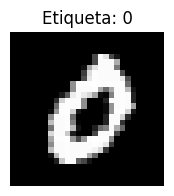

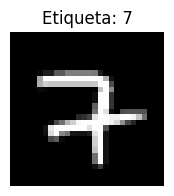

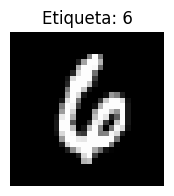

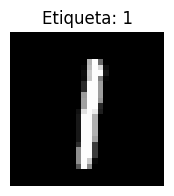

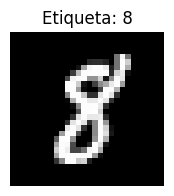

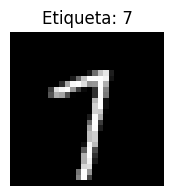

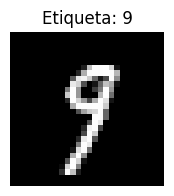

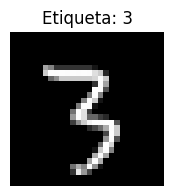

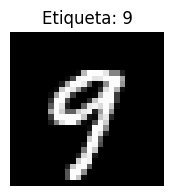

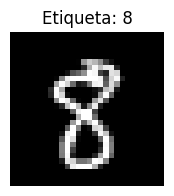

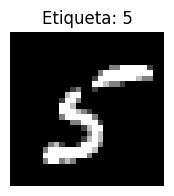

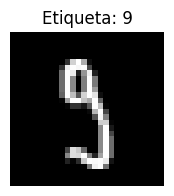

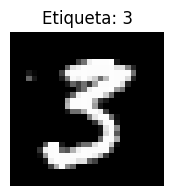

In [3]:
# Paso 2: Visualizar las primeras X imágenes del conjunto de entrenamiento
for i in range(50):
    plt.figure(figsize=(2, 2))  # Tamaño de la figura
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f"Etiqueta: {y_train[i]}")  # Título con la etiqueta de la imagen
    plt.axis('off')  # Ocultar ejes
    plt.show()

In [4]:
# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
# Paso 4: Definir el modelo MLP
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

c:\Users\LAPTOP\OneDrive\Escritorio\UdeA\Ingenieria de materiales\Celdas de combustible\Python\BooCham\mlp_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8639 - loss: 0.4804 - val_accuracy: 0.9607 - val_loss: 0.1252
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9697 - loss: 0.0965 - val_accuracy: 0.9718 - val_loss: 0.0890
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9829 - loss: 0.0561 - val_accuracy: 0.9731 - val_loss: 0.0921
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 0.9737 - val_loss: 0.0893
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9751 - val_loss: 0.0916
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9747 - val_loss: 0.0982
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9929 - loss: 0.0200 - val_accuracy: 0.9782 - val_loss: 0.0830
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9953 - loss: 0.0151 - val_acc

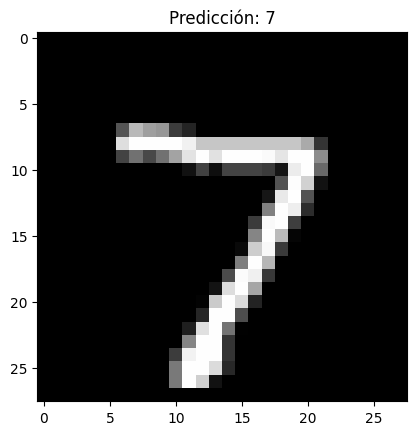

In [12]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Paso 6: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()
model.save('mlp_modelo_1.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicción para la imagen personalizada: 2


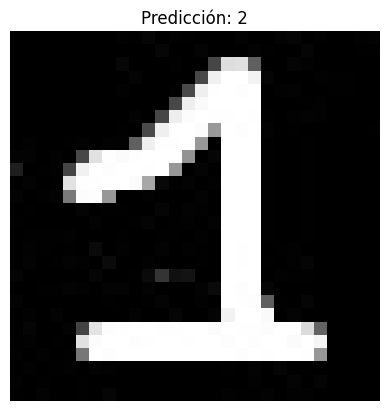

In [15]:
# Paso 9: Probar el modelo con una imagen personalizada
#ruta_imagen="D:/talento tech/ia/imagen1.png"
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')
    plt.show()
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada(r"C:\Users\LAPTOP\OneDrive\Escritorio\Sin título.jpg")